In [1]:
from docx import Document
import json
import pandas as pd

In [2]:
!pip install python-docx pandas

In [3]:
def parse_docx_to_dataframe(docx_path):
    doc = Document(docx_path)
    records = []
    
    for paragraph in doc.paragraphs:
        text = paragraph.text.strip() 
        if text:  
            try:
                record = json.loads(text)
                records.append(record)
            except json.JSONDecodeError:
                print(f"Skipping invalid JSON: {text}")
    
    # Flatten JSON objects into a DataFrame
    df = pd.json_normalize(records)  # Automatically handles nested JSON structures
    return flatten_flight_data(df)
def flatten_flight_data(raw_df):
    # Initialize a list to store flattened data
    flattened_data = []
    
    for row in raw_df.iterrows():
        for item in row[1]:  # Loop through each cell in the row
            if isinstance(item, dict):  # Check if the item is already a dictionary
                flattened_data.append(item)
            else:
                try:
                    flattened_data.append(json.loads(item))  # Parse stringified JSON
                except json.JSONDecodeError:
                    print(f"Skipping invalid entry: {item}")
    
    # Normalize the list of dictionaries into a DataFrame
    return pd.json_normalize(flattened_data)

# Example usage

# Example usage
# docx_path = "./Train\\5.docx"
# flight_data = parse_docx_to_dataframe(docx_path)
# # flattened_df = flatten_flight_data(flight_data)

# # Save to a CSV for easier inspection
# # flight_data.to_csv("parsed_flight_data.csv", index=False)

# flight_data

In [4]:
import os

def process_all_docx_files(folder_path):
    all_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".docx"):
            print(f"Processing {filename}...")
            file_path = os.path.join(folder_path, filename)
            df = parse_docx_to_dataframe(file_path)
            all_data.append(df)
    
    # Combine all data into one DataFrame
    combined_df = pd.concat(all_data, ignore_index=True)
    return combined_df

# Example usage
folder_path = "./Train"
uncleaned_train = process_all_docx_files(folder_path)
folder_path = "./Test"
uncleaned_test = process_all_docx_files(folder_path)
# all_flight_data.to_csv("all_parsed_flight_data.csv", index=False)
uncleaned_test.info()
uncleaned_train.info()

Processing 1.docx...
Processing 10.docx...
Processing 11.docx...
Processing 12.docx...
Processing 13.docx...
Processing 14.docx...
Processing 15.docx...
Processing 16.docx...
Processing 17.docx...
Processing 18.docx...
Processing 19.docx...
Processing 2.docx...
Processing 20.docx...
Processing 21.docx...
Processing 22.docx...
Processing 23.docx...
Processing 24.docx...
Processing 25.docx...
Processing 26.docx...
Processing 27.docx...
Processing 28.docx...
Processing 29.docx...
Processing 3.docx...
Processing 30.docx...
Processing 31.docx...
Processing 32.docx...
Processing 33.docx...
Processing 34.docx...
Processing 35.docx...
Processing 36.docx...
Processing 37.docx...
Processing 39.docx...
Processing 4.docx...
Processing 40.docx...
Processing 41.docx...
Processing 42.docx...
Processing 43.docx...
Processing 44.docx...
Processing 45.docx...
Processing 46.docx...
Processing 47.docx...
Processing 48.docx...
Processing 49.docx...
Processing 5.docx...
Processing 50.docx...
Processing 51.d

In [9]:
import pandas as pd

def transform_flight_data(df, file_name):
    # Transform the dataframe with the given file name
    df_transformed = pd.DataFrame({
        "File Name": file_name,  # Use the provided file_name (e.g., 'train' or 'test')
        "Flight Number": df["flight.number"],
        "Type": df["type"],
        "Status": df["status"],
        "Departure IATA Code": df["departure.iataCode"],
        "Departure ICAO Code": df["departure.icaoCode"],
        "Scheduled Time": pd.to_datetime(df["departure.scheduledTime"].str.replace("t", "T")),
        "Estimated Time": pd.to_datetime(df["departure.estimatedRunway"].str.replace("t", "T")), # df["departure.estimatedTime"],
        "Arrival IATA Code": df["arrival.iataCode"],
        "Arrival ICAO Code": df["arrival.icaoCode"],
        "Arrival Estimated Time": pd.to_datetime(df["arrival.estimatedTime"].str.replace("t", "T"))
        # Calculating delay as the difference between scheduled and actual times
        # "Delay": (pd.to_datetime(df["departure.actualTime"].str.replace("t", "T")) - pd.to_datetime(df["departure.scheduledTime"].str.replace("t", "T"))).dt.total_seconds() / 60,
    })

    return df_transformed


# Apply the transformation to both train and test DataFrames
train_transformed = transform_flight_data(uncleaned_train, "train")
test_transformed = transform_flight_data(uncleaned_test, "test")

combined_flight_df = pd.concat([train_transformed, test_transformed], ignore_index=True)
combined_flight_df


,File Name,Flight Number,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Estimated Time,Arrival IATA Code,Arrival ICAO Code,Arrival Estimated Time
0,train,737,departure,active,lhe,opla,2023-07-20 20:50:00,2023-07-20 20:15:00,ruh,oerk,2023-07-20 21:54:00
1,train,843,departure,active,lhe,opla,2023-07-18 15:05:00,NaT,khi,opkc,NaT
2,train,841,departure,active,lhe,opla,2023-07-23 09:50:00,NaT,khi,opkc,NaT
3,train,205,departure,active,lhe,opla,2023-07-26 23:30:00,2023-07-26 23:51:00,kwi,okkk,2023-07-27 01:24:00
4,train,723,departure,active,lhe,opla,2023-07-20 11:35:00,NaT,dxb,omdb,NaT
...,...,...,...,...,...,...,...,...,...,...,...
66477,test,412,departure,active,lhe,opla,2023-11-23 23:15:00,2023-11-23 23:27:00,shj,omsj,2023-11-24 01:34:00
66478,test,859,departure,active,lhe,opla,2023-11-25 18:45:00,2023-11-25 19:05:00,jed,oejn,2023-11-25 22:09:00
66479,test,6187,departure,active,lhe,opla,2023-11-25 02:55:00,2023-11-25 03:07:00,doh,othh,2023-11-25 04:33:00
66480,test,6032,departure,active,lhe,opla,2023-11-27 08:35:00,NaT,doh,othh,NaT


In [11]:
import pandas as pd
import os

# Define the path to the folder containing the Excel files
base_path = r"C:\Users\User\Downloads\ML-Proj-Dataset\Weather"

# Create a list to hold DataFrames
data_frames = []

# Loop through the range of file numbers
for i in range(1, 14):  # From 1.xlsx to 13.xlsx
    file_path = os.path.join(base_path, f"{i}.xlsx")
    # Read each Excel file and append to the list
    df = pd.read_excel(file_path)
    data_frames.append(df)

# Concatenate all the DataFrames into one
weather = pd.concat(data_frames, ignore_index=True)


In [12]:
from datetime import datetime
import numpy as np
# Function to process the 'Time' column
def process_time_column(time_string,second= False):
    months_data = time_string.split()
    month = months_data[0]
    days = map(int, months_data[1:])
    year = 2023
    dates = []
    
    for day in list(days):
        # print(day)
        if month in ["Jan", "Feb","Mar", "Apr", "May","Jun"] or month == "Jul" and second ==True  :  
            year = 2024
        date_str = f"{month} {day} {year}"
        # print(month, list(days), year)
        # print(date_str)
        try:
            dates.append(datetime.strptime(date_str, "%b %d %Y"))
            # print('appended: ', datetime.strptime(date_str, "%b %d %Y"))
        except:
            print(date_str, " issue on date")
            dates.append(np.nan)
    
    return pd.DataFrame({"Date": dates})

# Function to clean and process column strings
def map_column_values(column_string):
    # Remove 'Max', 'Avg', 'Min' headers
    cleaned_string = " ".join(
        word for word in column_string.split() if word not in {"Max", "Avg", "Min"}
    )
    # Convert to a list of floats
    values = list(map(float, cleaned_string.split()))
    # Create a DataFrame with Max, Avg, and Min values
    return pd.DataFrame({
        "Max": values[0::3],
        "Avg": values[1::3],
        "Min": values[2::3]
    })


all_combined_data = []
# Process the 'Time' column
for i in range(len(weather)):
    if i == len(weather)-1: 
        processed_time = process_time_column(weather["Time"][i], True)    
    else:
        processed_time = process_time_column(weather["Time"][i])
    
    # Process all specified columns
    columns_to_process = [
        "Temperature (°F)", "Dew Point (°F)", "Humidity (%)",
        "Wind Speed (mph)", "Pressure (in)"
    ]
    
    # Create individual DataFrames for each column
    processed_columns = [map_column_values(weather[col][i]) for col in columns_to_process]
    
    # Combine all processed DataFrames
    combined_data = pd.concat([processed_time] + processed_columns, axis=1)
    combined_data.columns = [
        "Date",
        "Max Temp (°F)", "Avg Temp (°F)", "Min Temp (°F)",
        "Max Dew (°F)", "Avg Dew (°F)", "Min Dew (°F)",
        "Max Humidity (%)", "Avg Humidity (%)", "Min Humidity (%)",
        "Max Wind Speed (mph)", "Avg Wind Speed (mph)", "Min Wind Speed (mph)",
        "Max Pressure (in)", "Avg Pressure (in)", "Min Pressure (in)"
    ]
    all_combined_data.append(combined_data)

# Concatenate all the processed data into one DataFrame
final_combined_data = pd.concat(all_combined_data, axis=0, ignore_index=True)

weather = final_combined_data
weather
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  380 non-null    datetime64[ns]
 1   Max Temp (°F)         380 non-null    float64       
 2   Avg Temp (°F)         380 non-null    float64       
 3   Min Temp (°F)         380 non-null    float64       
 4   Max Dew (°F)          380 non-null    float64       
 5   Avg Dew (°F)          380 non-null    float64       
 6   Min Dew (°F)          380 non-null    float64       
 7   Max Humidity (%)      380 non-null    float64       
 8   Avg Humidity (%)      380 non-null    float64       
 9   Min Humidity (%)      380 non-null    float64       
 10  Max Wind Speed (mph)  380 non-null    float64       
 11  Avg Wind Speed (mph)  380 non-null    float64       
 12  Min Wind Speed (mph)  380 non-null    float64       
 13  Max Pressure (in)   

In [13]:
# Ensure the 'Scheduled Time' column is in datetime format
combined_flight_df['Scheduled Time'] = pd.to_datetime(combined_flight_df['Scheduled Time'])

# Extract only the date part from 'Scheduled Time'
combined_flight_df['Scheduled Date'] = combined_flight_df['Scheduled Time'].dt.date

# Ensure 'Date' column in weather is in datetime format and extract only the date
weather['Date'] = pd.to_datetime(weather['Date']).dt.date

# Perform an inner join on 'Scheduled Date' and 'Date' to match rows
combined = combined_flight_df.merge(weather, left_on='Scheduled Date', right_on='Date', how='inner')

# Drop the 'Scheduled Date' column after merging as it's no longer needed
combined = combined.drop(columns=['Scheduled Date'])

# Resulting DataFrame
combined.info()
combined

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66482 entries, 0 to 66481
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   File Name               66482 non-null  object        
 1   Flight Number           66482 non-null  object        
 2   Type                    66482 non-null  object        
 3   Status                  66482 non-null  object        
 4   Departure IATA Code     66482 non-null  object        
 5   Departure ICAO Code     66482 non-null  object        
 6   Scheduled Time          66482 non-null  datetime64[ns]
 7   Estimated Time          39685 non-null  datetime64[ns]
 8   Arrival IATA Code       66482 non-null  object        
 9   Arrival ICAO Code       66482 non-null  object        
 10  Arrival Estimated Time  38603 non-null  datetime64[ns]
 11  Date                    66482 non-null  object        
 12  Max Temp (°F)           66482 non-null  float6

,File Name,Flight Number,Type,Status,Departure IATA Code,Departure ICAO Code,Scheduled Time,Estimated Time,Arrival IATA Code,Arrival ICAO Code,...,Min Dew (°F),Max Humidity (%),Avg Humidity (%),Min Humidity (%),Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (in),Avg Pressure (in),Min Pressure (in)
0,train,737,departure,active,lhe,opla,2023-07-20 20:50:00,2023-07-20 20:15:00,ruh,oerk,...,77.0,89.0,76.0,63.0,12.0,5.3,0.0,28.9,28.8,28.7
1,train,843,departure,active,lhe,opla,2023-07-18 15:05:00,NaT,khi,opkc,...,77.0,84.0,73.8,63.0,17.0,10.2,0.0,28.8,28.8,28.7
2,train,841,departure,active,lhe,opla,2023-07-23 09:50:00,NaT,khi,opkc,...,73.0,83.0,71.2,56.0,14.0,8.1,0.0,29.0,28.9,28.8
3,train,205,departure,active,lhe,opla,2023-07-26 23:30:00,2023-07-26 23:51:00,kwi,okkk,...,75.0,100.0,77.4,59.0,17.0,8.1,0.0,28.9,28.9,28.8
4,train,723,departure,active,lhe,opla,2023-07-20 11:35:00,NaT,dxb,omdb,...,77.0,89.0,76.0,63.0,12.0,5.3,0.0,28.9,28.8,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66477,test,412,departure,active,lhe,opla,2023-11-23 23:15:00,2023-11-23 23:27:00,shj,omsj,...,0.0,88.0,69.3,0.0,6.0,0.7,0.0,29.2,28.6,0.0
66478,test,859,departure,active,lhe,opla,2023-11-25 18:45:00,2023-11-25 19:05:00,jed,oejn,...,48.0,88.0,69.2,44.0,8.0,1.0,0.0,29.3,29.3,29.2
66479,test,6187,departure,active,lhe,opla,2023-11-25 02:55:00,2023-11-25 03:07:00,doh,othh,...,48.0,88.0,69.2,44.0,8.0,1.0,0.0,29.3,29.3,29.2
66480,test,6032,departure,active,lhe,opla,2023-11-27 08:35:00,NaT,doh,othh,...,52.0,88.0,74.4,60.0,12.0,2.3,0.0,29.3,29.3,29.2


In [17]:
# Ensure Scheduled Date is in datetime format
combined_flight_df['Scheduled Date'] = pd.to_datetime(combined_flight_df['Scheduled Date'])

# Filter for dates between July 1, 2023, and July 31, 2024
filtered_flight = combined_flight_df[
    (combined_flight_df['Scheduled Date'] >= '2023-07-01') & 
    (combined_flight_df['Scheduled Date'] <= '2024-07-31')
]

# Print the filtered Scheduled Date column and its length
print(filtered_flight['Scheduled Date'])
print("Number of rows:", len(filtered_flight))


0       2023-07-20
1       2023-07-18
2       2023-07-23
3       2023-07-26
4       2023-07-20
           ...    
66477   2023-11-23
66478   2023-11-25
66479   2023-11-25
66480   2023-11-27
66481   2023-11-26
Name: Scheduled Date, Length: 66482, dtype: datetime64[ns]
Number of rows: 66482


# Missing Value Handling

### Mean Imputation

In [19]:
# test

def fill_missing_with_mean(df, columns):
    """
    Fills missing values in the specified columns of a DataFrame with their column mean.
    Converts datetime columns to numeric timestamps for calculation, and back after imputation.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of column names to fill missing values.
    
    Returns:
    pd.DataFrame: A new DataFrame with missing values filled.
    """
    # Create a copy to avoid modifying the original DataFrame
    df_filled = df.copy()
    
    for column in columns:
        if df_filled[column].dtype == 'datetime64[ns]':
            # Convert datetime to numeric (timestamps) for mean calculation
            df_filled[column] = df_filled[column].apply(lambda x: x.timestamp() if pd.notnull(x) else x)
            # Fill missing values with the mean
            df_filled[column] = df_filled[column].fillna(df_filled[column].mean())
            # Convert back to datetime
            df_filled[column] = pd.to_datetime(df_filled[column], unit='s')
        else:
            # Fill non-datetime columns directly with their mean
            df_filled[column] = df_filled[column].fillna(df_filled[column].mean())
    
    return df_filled

# Usage example
columns_to_fill = ["Estimated Time", "Arrival Estimated Time"]
new_combined = fill_missing_with_mean(combined, columns_to_fill)

# Verify the result
print('nulls:\n',new_combined[["Estimated Time", "Scheduled Time", "Arrival Estimated Time"]].isnull().sum())
new_combined.info()

nulls:
 Estimated Time            0
Scheduled Time            0
Arrival Estimated Time    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66482 entries, 0 to 66481
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   File Name               66482 non-null  object        
 1   Flight Number           66482 non-null  object        
 2   Type                    66482 non-null  object        
 3   Status                  66482 non-null  object        
 4   Departure IATA Code     66482 non-null  object        
 5   Departure ICAO Code     66482 non-null  object        
 6   Scheduled Time          66482 non-null  datetime64[ns]
 7   Estimated Time          66482 non-null  datetime64[ns]
 8   Arrival IATA Code       66482 non-null  object        
 9   Arrival ICAO Code       66482 non-null  object        
 10  Arrival Estimated Time  66482 non-null  datetime64[ns]
 11  D

C:\Users\User\AppData\Local\Temp\ipykernel_8492\3297391935.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filled[column] = df_filled[column].fillna(df_filled[column].mean())
C:\Users\User\AppData\Local\Temp\ipykernel_8492\3297391935.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filled[column] = df_filled[column].fillna(df_filled[column].mean())


### Model Prediction Imputation

In [21]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

def relative_error(y_true, y_pred):
    """
    Calculate the relative error as a percentage.
    """
    relative_errors = np.abs((y_true - y_pred) / np.where(y_true == 0, 1e-10, y_true))
    print((y_true - y_pred).mean() )
    return np.mean(relative_errors) * 100
 # in percentage

def predict_missing_datetime_with_cv(df, columns, cv=5):
    """
    Predicts missing datetime values in the specified columns using a RandomForest model,
    with cross-validation to evaluate performance using MAE, MSE, and relative error.
    Converts datetime columns to numeric (timestamps) for training and prediction.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of datetime columns to predict missing values.
    cv (int): Number of cross-validation folds.

    Returns:
    pd.DataFrame: A new DataFrame with predicted missing datetime values.
    """
    df_filled = df.copy()
    
    for column in columns:
        if df_filled[column].dtype == 'datetime64[ns]':
            # Convert datetime to numeric (timestamps)
            df_filled[column] = df_filled[column].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)
            
            # Prepare data for modeling
            not_null_data = df_filled[df_filled[column].notnull()]
            null_data = df_filled[df_filled[column].isnull()]
            
            # Features and target
            target = not_null_data[column]
            features = not_null_data.drop(columns, axis=1).select_dtypes(include=[np.number])
            
            # Train-test split (for evaluation purposes)
            X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
            
            # Train a Random Forest model
            model = RandomForestRegressor(random_state=42)
            model.fit(X_train, y_train)
            
            # Predict missing values using the model
            if not null_data.empty:
                missing_features = null_data.drop(columns, axis=1).select_dtypes(include=[np.number])
                predicted_values = model.predict(missing_features)
                
                # Fill the missing values with predictions
                df_filled.loc[df_filled[column].isnull(), column] = predicted_values
            
            # Evaluate the model using cross-validation for MAE
            mae_cv_scores = cross_val_score(model, features, target, cv=cv, scoring='neg_mean_absolute_error')
            print(f"Cross-validated MAE for {column}: {-np.mean(mae_cv_scores):.4f} (using {cv}-fold CV)")

            # Evaluate the model using cross-validation for MSE
            mse_cv_scores = cross_val_score(model, features, target, cv=cv, scoring='neg_mean_squared_error')
            print(f"Cross-validated MSE for {column}: {-np.mean(mse_cv_scores):.4f} (using {cv}-fold CV)")

            # Evaluate the relative error
            y_pred = model.predict(X_test)
            rel_error = relative_error(y_test, y_pred)
            print(f"Relative Error for {column}: {rel_error:.2f}%")

            # Convert back to datetime
            df_filled[column] = pd.to_datetime(df_filled[column], unit='s')
        else:
            raise ValueError(f"Column {column} is not a datetime64[ns] type.")
    
    return df_filled

# Usage example
# train
columns_to_predict = ["Estimated Time", "Actual Time", "Arrival Estimated Time"]

# test
columns_to_predict = ["Estimated Time", "Arrival Estimated Time"]

new_combined_with_cv = predict_missing_datetime_with_cv(combined, columns_to_predict)

# Verify the result
print(new_combined_with_cv[columns_to_predict].isnull().sum())

Cross-validated MAE for Estimated Time: 20846.5769 (using 5-fold CV)
Cross-validated MSE for Estimated Time: 600215618.5813 (using 5-fold CV)
-293.92457019686475
Relative Error for Estimated Time: 0.00%
Cross-validated MAE for Arrival Estimated Time: 21492.5325 (using 5-fold CV)
Cross-validated MSE for Arrival Estimated Time: 652069749.4219 (using 5-fold CV)
91.12211545216823
Relative Error for Arrival Estimated Time: 0.00%
Estimated Time            0
Arrival Estimated Time    0
dtype: int64


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

def predict_missing_datetime_with_model(df, columns, model, cv=5):
    """
    Predicts missing datetime values in the specified columns using a custom regression model,
    with cross-validation to evaluate performance using MAE, MSE, and relative error.
    """
    df_filled = df.copy()
    
    for column in columns:
        if df_filled[column].dtype == 'datetime64[ns]':
            df_filled[column] = df_filled[column].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)
            not_null_data = df_filled[df_filled[column].notnull()]
            null_data = df_filled[df_filled[column].isnull()]
            
            target = not_null_data[column]
            features = not_null_data.drop(columns, axis=1).select_dtypes(include=[np.number])
            X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
            
            # Train the specified model
            model.fit(X_train, y_train)
            
            # Predict missing values
            if not null_data.empty:
                missing_features = null_data.drop(columns, axis=1).select_dtypes(include=[np.number])
                predicted_values = model.predict(missing_features)
                df_filled.loc[df_filled[column].isnull(), column] = predicted_values
            
            # Cross-validation
            mae_cv_scores = cross_val_score(model, features, target, cv=cv, scoring='neg_mean_absolute_error')
            mse_cv_scores = cross_val_score(model, features, target, cv=cv, scoring='neg_mean_squared_error')
            
            # Evaluation metrics
            print(f"Column: {column}")
            print(f"MAE (CV): {-np.mean(mae_cv_scores):.4f}")
            print(f"MSE (CV): {-np.mean(mse_cv_scores):.4f}")
            y_pred = model.predict(X_test)
            rel_error = relative_error(y_test, y_pred)
            print(f"Relative Error: {rel_error:.2f}%")
            
            df_filled[column] = pd.to_datetime(df_filled[column], unit='s')
        else:
            raise ValueError(f"Column {column} is not a datetime64[ns] type.")
    
    return df_filled

# Example usage
from sklearn.linear_model import LinearRegression

columns_to_predict = ["Estimated Time", "Arrival Estimated Time"]
# linear_regression_model = LinearRegression()
# new_combined_with_lr = predict_missing_datetime_with_model(combined, columns_to_predict, linear_regression_model)
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)


Column: Estimated Time
MAE (CV): 4546935.7431
MSE (CV): 37893167416166.7031
-68085.01559097826
Relative Error: 0.25%
Column: Arrival Estimated Time
MAE (CV): 4549082.0003
MSE (CV): 37984293101886.3750
-6199.910493446375
Relative Error: 0.25%


In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Relative error calculation
def relative_error(y_true, y_pred):
    relative_errors = np.abs((y_true - y_pred) / np.where(y_true == 0, 1e-10, y_true))
    return np.mean(relative_errors) * 100  # percentage

# General function for all models
def predict_missing_datetime_with_model(df, columns, model, model_name, cv=5):
    """
    Predicts missing datetime values for specified columns using a given model.
    """
    print(f"\n--- Using Model: {model_name} ---")
    df_filled = df.copy()

    for column in columns:
        if df_filled[column].dtype == 'datetime64[ns]':
            # Convert datetime to numeric
            df_filled[column] = df_filled[column].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)
            not_null_data = df_filled[df_filled[column].notnull()]
            null_data = df_filled[df_filled[column].isnull()]
            
            # Features and target
            target = not_null_data[column]
            features = not_null_data.drop(columns, axis=1).select_dtypes(include=[np.number])
            X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
            
            # Train the model
            model.fit(X_train, y_train)
            
            # Predict missing values
            if not null_data.empty:
                missing_features = null_data.drop(columns, axis=1).select_dtypes(include=[np.number])
                predicted_values = model.predict(missing_features)
                df_filled.loc[df_filled[column].isnull(), column] = predicted_values
            
            # Cross-validation
            mae_cv_scores = cross_val_score(model, features, target, cv=cv, scoring='neg_mean_absolute_error')
            mse_cv_scores = cross_val_score(model, features, target, cv=cv, scoring='neg_mean_squared_error')
            
            # Evaluation
            print(f"Column: {column}")
            print(f"Cross-Validated MAE: {-np.mean(mae_cv_scores):.4f}")
            print(f"Cross-Validated MSE: {-np.mean(mse_cv_scores):.4f}")
            
            # Test set evaluation
            y_pred = model.predict(X_test)
            rel_error = relative_error(y_test, y_pred)
            print(f"Relative Error: {rel_error:.2f}%")
            
            # Convert back to datetime
            df_filled[column] = pd.to_datetime(df_filled[column], unit='s')
        else:
            raise ValueError(f"Column {column} is not a datetime64[ns] type.")

    return df_filled

# Models to test
models = [
    # (LinearRegression(), "Linear Regression"),
    (RandomForestRegressor(random_state=42), "Random Forest Regressor")
    # (GradientBoostingRegressor(random_state=42), "Gradient Boosting Regressor"),
    # (SVR(kernel='rbf'), "Support Vector Regression (SVR)"),
    # (MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42), "Neural Network (MLP Regressor)"),
    # (XGBRegressor(random_state=42), "XGBoost Regressor")
]

# Specify columns to predict
columns_to_predict = ["Estimated Time", "Arrival Estimated Time"]

# Dictionary to store DataFrames
saved_dfs = {}

# Run for each model
for model, model_name in models:
    try:
        print(f"\nProcessing with {model_name}")
        df_with_predictions = predict_missing_datetime_with_model(combined, columns_to_predict, model, model_name)
        saved_dfs[model_name] = df_with_predictions
        # Save to CSV
        df_with_predictions.to_csv(f"{model_name.replace(' ', '_').lower()}_predictions.csv", index=False)
        print(f"Saved results for {model_name}\n")
    except Exception as e:
        print(f"Error with {model_name}: {e}")



Processing with Random Forest Regressor

--- Using Model: Random Forest Regressor ---
Column: Estimated Time
Cross-Validated MAE: 20846.5769
Cross-Validated MSE: 600215618.5813
Relative Error: 0.00%
Column: Arrival Estimated Time
Cross-Validated MAE: 21492.5325
Cross-Validated MSE: 652069749.4219
Relative Error: 0.00%
Saved results for Random Forest Regressor



In [27]:
saved_dfs

{'Linear Regression':       File Name Flight Number       Type  Status Departure IATA Code  \
 0         train           737  departure  active                 lhe   
 1         train           843  departure  active                 lhe   
 2         train           841  departure  active                 lhe   
 3         train           205  departure  active                 lhe   
 4         train           723  departure  active                 lhe   
 ...         ...           ...        ...     ...                 ...   
 66477      test           412  departure  active                 lhe   
 66478      test           859  departure  active                 lhe   
 66479      test          6187  departure  active                 lhe   
 66480      test          6032  departure  active                 lhe   
 66481      test          1194  departure  active                 lhe   
 
       Departure ICAO Code      Scheduled Time                Estimated Time  \
 0                   

# Feature Engineering

In [48]:
# import pandas as pd
# from datetime import datetime

# # Function to assign season based on the month
# def assign_season(month):
#     if month in [12, 1, 2]:  # Winter
#         return 0
#     elif month in [3, 4, 5]:  # Spring
#         return 1
#     elif month in [6, 7, 8]:  # Summer
#         return 2
#     elif month in [9, 10, 11]:  # Fall
#         return 3

# # Function to calculate delay in minutes
# def calculate_delay(scheduled, actual):
#     try:
#         # Calculate delay in minutes
#         delay = (actual - scheduled).total_seconds() / 60  # Convert seconds to minutes
#         if delay < 0:
#             return 0  # No negative delays
#         return round(delay)
#     except (ValueError, AttributeError):  # Handle invalid or missing data
#         return None

# # Function to apply new features to each DataFrame in saved_dfs
# def apply_new_features(saved_dfs):
#     for name, df in saved_dfs.items():
#         # print(f"Updating {name} with new features...")

#         # Apply the delay calculation
#         df["Delay (minutes)"] = df.apply(
#             lambda row: calculate_delay(row["Scheduled Time"], row["Estimated Time"]), axis=1
#         )

#         # Weather severity calculation
#         df['Weather Severity'] = (
#             df['Max Wind Speed (mph)'] * 0.4 +
#             (100 - df['Avg Humidity (%)']) * 0.3 +
#             (df['Max Temp (°F)'] - df['Min Temp (°F)']) * 0.3
#         )

#         # Temporal features
#         df['IsWeekend'] = df['Scheduled Time'].dt.weekday >= 5
#         df['PeakHour'] = df['Scheduled Time'].dt.hour.between(6, 9) | df['Scheduled Time'].dt.hour.between(17, 20)
#         df['Season'] = df['Scheduled Time'].dt.month.apply(assign_season)

#         # New features
#         df['Avg Departure Delay (Airport)'] = df.groupby('Departure IATA Code')['Delay (minutes)'].transform('mean')
#         df['Hourly Traffic (Airport)'] = df.groupby(
#             ['Departure IATA Code', df['Scheduled Time'].dt.floor('h')]
#         )['Flight Number'].transform('count')
#         df['Flight Consistency'] = df.groupby('Flight Number')['Delay (minutes)'].transform('std')

#         # You can check the DataFrame info to confirm new columns have been added
#         # print(f"Updated {name} DataFrame info:")
#         df.info()

#     return saved_dfs

# # Apply the feature transformations to all DataFrames in saved_dfs
# saved_dfs = apply_new_features(saved_dfs)

# # If needed, you can check for unique values in any DataFrame's columns to verify
# # for name, df in saved_dfs.items():
# #     print(f"\nUnique values in columns of {name}:")
# #     for column in df.columns:
# #         print(f"Unique values in column '{column}':")
# #         print(df[column].unique())
# #         print("\n")  # Add a newline for readability


import pandas as pd
from datetime import datetime

# Function to assign season based on the month
def assign_season(month):
    if month in [12, 1, 2]:  # Winter
        return 0
    elif month in [3, 4, 5]:  # Spring
        return 1
    elif month in [6, 7, 8]:  # Summer
        return 2
    elif month in [9, 10, 11]:  # Fall
        return 3

# Function to calculate delay in minutes
def calculate_delay(scheduled, actual):
    try:
        # Calculate delay in minutes
        delay = (actual - scheduled).total_seconds() / 60  # Convert seconds to minutes
        if delay < 0:
            return 0  # No negative delays
        return round(delay)
    except (ValueError, AttributeError):  # Handle invalid or missing data
        return None

# Function to apply new features to each DataFrame in saved_dfs
def apply_new_features(saved_dfs):
    for name, df in saved_dfs.items():
        # Convert datetime columns to Unix time in seconds
        for time_col in ["Scheduled Time", "Estimated Time", "Arrival Estimated Time"]:
            df[time_col] = pd.to_datetime(df[time_col], errors='coerce')  # Safely convert to datetime
            df[time_col + " (Unix)"] = df[time_col].view('int64') // 10**9  # Convert to Unix time in seconds

        # Apply the delay calculation
        df["Delay (minutes)"] = df.apply(
            lambda row: calculate_delay(row["Scheduled Time"], row["Estimated Time"]), axis=1
        )

        # Weather severity calculation
        df['Weather Severity'] = (
            df['Max Wind Speed (mph)'] * 0.4 +
            (100 - df['Avg Humidity (%)']) * 0.3 +
            (df['Max Temp (°F)'] - df['Min Temp (°F)']) * 0.3
        )

        # Temporal features
        df['IsWeekend'] = df['Scheduled Time'].dt.weekday >= 5
        df['PeakHour'] = df['Scheduled Time'].dt.hour.between(6, 9) | df['Scheduled Time'].dt.hour.between(17, 20)
        df['Season'] = df['Scheduled Time'].dt.month.apply(assign_season)

        # New features
        df['Avg Departure Delay (Airport)'] = df.groupby('Departure IATA Code')['Delay (minutes)'].transform('mean')
        df['Hourly Traffic (Airport)'] = df.groupby(
            ['Departure IATA Code', df['Scheduled Time'].dt.floor('h')]
        )['Flight Number'].transform('count')
        df['Flight Consistency'] = df.groupby('Flight Number')['Delay (minutes)'].transform('std')

        # Display DataFrame info to confirm new columns
        print(f"Updated {name} DataFrame info:")
        df.info()

    return saved_dfs

# Apply the feature transformations to all DataFrames in saved_dfs
saved_dfs = apply_new_features(saved_dfs)

# Example to verify Unix time extraction
for name, df in saved_dfs.items():
    print(f"\nSample rows for {name} DataFrame (including Unix time columns):")
    print(df.head())


C:\Users\User\AppData\Local\Temp\ipykernel_26036\1734201328.py:104: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df[time_col + " (Unix)"] = df[time_col].view('int64') // 10**9  # Convert to Unix time in seconds
C:\Users\User\AppData\Local\Temp\ipykernel_26036\1734201328.py:104: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df[time_col + " (Unix)"] = df[time_col].view('int64') // 10**9  # Convert to Unix time in seconds
C:\Users\User\AppData\Local\Temp\ipykernel_26036\1734201328.py:104: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df[time_col + " (Unix)"] = df[time_col].view('int64') // 10**9  # Convert to Unix time in seconds


Updated Random Forest Regressor DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66482 entries, 0 to 66481
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   File Name                      66482 non-null  object        
 1   Flight Number                  66482 non-null  object        
 2   Type                           66482 non-null  object        
 3   Status                         66482 non-null  object        
 4   Departure IATA Code            66482 non-null  object        
 5   Departure ICAO Code            66482 non-null  object        
 6   Scheduled Time                 66482 non-null  datetime64[ns]
 7   Estimated Time                 66482 non-null  datetime64[ns]
 8   Arrival IATA Code              66482 non-null  object        
 9   Arrival ICAO Code              66482 non-null  object        
 10  Arrival Estimated Time         664

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# # Function to plot confusion matrix
# def plot_confusion_matrix(cm, classes, model_name):
#     plt.figure(figsize=(6, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
#     plt.title(f'Confusion Matrix - {model_name}')
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.show()

# # Function to evaluate model
# def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
    
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='binary')  # Binary for binary classification
#     recall = recall_score(y_test, y_pred, average='binary')  # Binary for binary classification
#     f1 = f1_score(y_test, y_pred, average='binary')  # Binary for binary classification
    
#     print(f"Evaluation for {model_name}:")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1-Score: {f1:.4f}")
    
#     # Confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     plot_confusion_matrix(cm, ['On-time', 'Delayed'], model_name)

# # Binary classification function
# def binary_classification(df, target_column, models):
#     # Create binary target variable: 0 for on-time, 1 for delayed
#     df['Delay Category'] = df[target_column].apply(lambda x: 1 if x > 0 else 0)

#     X = df.drop(columns=['Delay Category', target_column])  # Features
#     y = df['Delay Category']  # Target

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Train and evaluate each model
#     for model, model_name in models:
#         evaluate_model(model, X_train, X_test, y_train, y_test, model_name)

# # Multi-Class classification function
# def multi_class_classification(df, target_column, models):
#     # Create multi-class target variable based on delay
#     def delay_category(x):
#         if x == 0:
#             return 0  # No Delay
#         elif 0 < x <= 45:
#             return 1  # Short Delay
#         elif 45 < x <= 175:
#             return 2  # Moderate Delay
#         else:
#             return 3  # Long Delay

#     df['Delay Category'] = df[target_column].apply(delay_category)

#     X = df.drop(columns=['Delay Category', target_column])  # Features
#     y = df['Delay Category']  # Target

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Train and evaluate each model
#     for model, model_name in models:
#         evaluate_model(model, X_train, X_test, y_train, y_test, model_name)

# # Models for Binary Classification
# binary_models = [
#     (LogisticRegression(), "Logistic Regression"),
#     (RandomForestClassifier(random_state=42), "Random Forest"),
#     (SVC(), "Support Vector Machine"),
#     (MLPClassifier(random_state=42), "Neural Network"),
#     (XGBClassifier(random_state=42), "XGBoost")
# ]

# # Models for Multi-Class Classification
# multi_class_models = [
#     # (LogisticRegression(), "Logistic Regression"),
#     (RandomForestClassifier(random_state=42), "Random Forest")
#     # (GradientBoostingClassifier(random_state=42), "Gradient Boosting"),
#     # (SVC(), "Support Vector Machine"),
#     # (MLPClassifier(random_state=42), "Neural Network"),
#     # (XGBClassifier(random_state=42), "XGBoost")
# ]

# # Assuming the dataset is in `df`
# target_column = "Delay (minutes)"  # The column that contains the delay values

# # Run Binary Classification
# print("\n--- Binary Classification ---")
# binary_classification(df, target_column, binary_models)

# # Run Multi-Class Classification
# print("\n--- Multi-Class Classification ---")
# multi_class_classification(df, target_column, multi_class_models)


In [169]:
# # Assuming df is your DataFrame and 'Delay (minutes)' is the target
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Check datetime columns
# datetime_columns = df.select_dtypes(include=['datetime64']).columns

# # Convert datetime columns to numerical
# for col in datetime_columns:
#     df[col] = (df[col] - df[col].min()).dt.days  # Example: number of days since min date

# # Split the data
# X = df.drop(columns=['Delay (minutes)'])  # Features
# y = df['Delay (minutes)']  # Target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define your models
# binary_models = [
#     # (LogisticRegression(), "Logistic Regression"),
#     (RandomForestClassifier(random_state=42), "Random Forest")
#     # Add more models as needed
# ]
# print(X.head())  # For feature matrix
# print(y.head())  # For target variable

# # Train and evaluate each model
# for model, model_name in binary_models:
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"{model_name} Accuracy: {accuracy}")
saved_dfs.keys()

dict_keys(['Linear Regression', 'Random Forest Regressor'])

## cat cols

In [51]:
# Categorize columns by datatype
df = saved_dfs['Random Forest Regressor']
datetime_cols = df.select_dtypes(include=["datetime64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["number"]).columns

# Display columns by type
print("Datetime Columns:", list(datetime_cols))
print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

# Convert 'Delay (minutes)' to binary classification (0/1)
# df["Delay (minutes)"] = (df["Delay (minutes)"] > 0).astype(int)
# df["Delay (minutes)"] = pd.cut(df["Delay (minutes)"], bins=[-1, 0, 45, 175, float('inf')], 
#                                labels=["No Delay", "Short Delay", "Moderate Delay", "Long Delay"])


print("Updated Target Column (Delay):")
print(df["Delay (minutes)"].value_counts())
df.to_csv('cleaned_data.csv', index=False)


Datetime Columns: ['Scheduled Time', 'Estimated Time', 'Arrival Estimated Time']
Categorical Columns: ['File Name', 'Flight Number', 'Type', 'Status', 'Departure IATA Code', 'Departure ICAO Code', 'Arrival IATA Code', 'Arrival ICAO Code', 'Date']
Numerical Columns: ['Max Temp (°F)', 'Avg Temp (°F)', 'Min Temp (°F)', 'Max Dew (°F)', 'Avg Dew (°F)', 'Min Dew (°F)', 'Max Humidity (%)', 'Avg Humidity (%)', 'Min Humidity (%)', 'Max Wind Speed (mph)', 'Avg Wind Speed (mph)', 'Min Wind Speed (mph)', 'Max Pressure (in)', 'Avg Pressure (in)', 'Min Pressure (in)', 'Scheduled Time (Unix)', 'Estimated Time (Unix)', 'Arrival Estimated Time (Unix)', 'Delay (minutes)', 'Weather Severity', 'Season', 'Avg Departure Delay (Airport)', 'Hourly Traffic (Airport)', 'Flight Consistency']
Updated Target Column (Delay):
Delay (minutes)
0       18728
10       1701
12       1587
11       1540
8        1512
        ...  
1034        1
781         1
979         1
826         1
844         1
Name: count, Length: 78

In [97]:
# TRUNCATING FOR CLASS IMBALANCE REMOVAL
# Categorize columns by datatype
datetime_cols = df.select_dtypes(include=["datetime64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["number"]).columns

# Display columns by type
print("Datetime Columns:", list(datetime_cols))
print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

# Convert 'Delay (minutes)' to binary classification (0/1)
df["Delay (minutes)"] = (df["Delay (minutes)"] > 0).astype(int)
print("Updated Target Column (Delay):")
print(df["Delay (minutes)"].value_counts())

# Split data into train and test sets based on 'File Name'
print("Splitting data into training and testing sets based on 'File Name'...")
train_data = df[df["File Name"].str.contains("train")]
test_data = df[df["File Name"].str.contains("test")]

# Verify original distributions
print("Original Train Distribution:")
print(train_data["Delay (minutes)"].value_counts())
print("Original Test Distribution:")
print(test_data["Delay (minutes)"].value_counts())

# Downsample 'Delayed' class (1) in both train and test sets
# Calculate minority class count in both train and test sets
train_minority_count = train_data["Delay (minutes)"].value_counts().min()
test_minority_count = test_data["Delay (minutes)"].value_counts().min()

# Use the minimum count for the minority class in the train and test sets
final_minority_count = min(train_minority_count, test_minority_count)

# Downsample train data
train_delayed = train_data[train_data["Delay (minutes)"] == 1].sample(final_minority_count, random_state=42)
train_ontime = train_data[train_data["Delay (minutes)"] == 0].sample(final_minority_count, random_state=42)
train_balanced = pd.concat([train_ontime, train_delayed]).sample(frac=1, random_state=42)

# Downsample test data
test_delayed = test_data[test_data["Delay (minutes)"] == 1].sample(final_minority_count, random_state=42)
test_ontime = test_data[test_data["Delay (minutes)"] == 0].sample(final_minority_count, random_state=42)
test_balanced = pd.concat([test_ontime, test_delayed]).sample(frac=1, random_state=42)

# Verify the new distributions
print("Balanced Train Distribution:")
print(train_balanced["Delay (minutes)"].value_counts())
print("Balanced Test Distribution:")
print(test_balanced["Delay (minutes)"].value_counts())

# Prepare features and targets for model training
categorical_cols = [
    'Flight Number', 'Type', 'Status', 
    'Departure IATA Code', 'Departure ICAO Code', 
    'Arrival IATA Code', 'Arrival ICAO Code'
]
numerical_cols = [
    'Max Temp (°F)', 'Avg Temp (°F)', 'Min Temp (°F)', 'Max Dew (°F)', 
    'Avg Dew (°F)', 'Min Dew (°F)', 'Max Humidity (%)', 'Avg Humidity (%)', 
    'Min Humidity (%)', 'Max Wind Speed (mph)', 'Avg Wind Speed (mph)', 
    'Min Wind Speed (mph)', 'Max Pressure (in)', 'Avg Pressure (in)', 
    'Min Pressure (in)', 'Scheduled Time (Unix)', 'Estimated Time (Unix)', 
    'Arrival Estimated Time (Unix)', 'Weather Severity', 'Season', 
    'Avg Departure Delay (Airport)', 'Hourly Traffic (Airport)'
]

X_train = train_balanced[categorical_cols + numerical_cols]
y_train = train_balanced["Delay (minutes)"]
X_test = test_balanced[categorical_cols + numerical_cols]
y_test = test_balanced["Delay (minutes)"]


Accuracy: 0.7838
Precision: 0.8054
Recall: 0.9196
F1-Score: 0.8587

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.44      0.54      4257
           1       0.81      0.92      0.86     10653

    accuracy                           0.78     14910
   macro avg       0.75      0.68      0.70     14910
weighted avg       0.77      0.78      0.77     14910



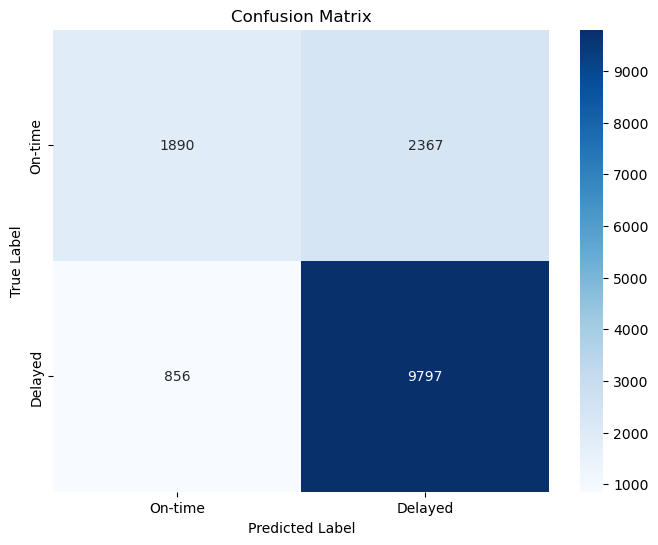

In [29]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report, 
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Specify categorical and numerical columns
categorical_cols = [
    'Flight Number', 'Type', 'Status', 
    'Departure IATA Code', 'Departure ICAO Code', 
    'Arrival IATA Code', 'Arrival ICAO Code'
]
numerical_cols = [
    'Max Temp (°F)', 'Avg Temp (°F)', 'Min Temp (°F)', 'Max Dew (°F)', 
    'Avg Dew (°F)', 'Min Dew (°F)', 'Max Humidity (%)', 'Avg Humidity (%)', 
    'Min Humidity (%)', 'Max Wind Speed (mph)', 'Avg Wind Speed (mph)', 
    'Min Wind Speed (mph)', 'Max Pressure (in)', 'Avg Pressure (in)', 
    'Min Pressure (in)', 'Scheduled Time (Unix)', 'Estimated Time (Unix)', 
    'Arrival Estimated Time (Unix)', 'Weather Severity', 'Season', 
    'Avg Departure Delay (Airport)', 'Hourly Traffic (Airport)'
]

# Target column (binary classification)
# df["Delay (minutes)"] = (df["Delay (minutes)"] > 0).astype(int)
target_col = "Delay (minutes)"

# Split data into training and testing
train_data = df[df["File Name"].str.contains("train")]
test_data = df[df["File Name"].str.contains("test")]

X_train = train_data[categorical_cols + numerical_cols]
y_train = train_data[target_col]
X_test = test_data[categorical_cols + numerical_cols]
y_test = test_data[target_col]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)

# Define the model
# model = RandomForestClassifier(random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)
# Create a pipeline
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["On-time", "Delayed"], yticklabels=["On-time", "Delayed"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [34]:
# # print(y_train.value_counts())
# # print(y_test.value_counts())
# # from sklearn.metrics import ConfusionMatrixDisplay

# # ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# import pandas as pd
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV, cross_val_score
# from sklearn.metrics import (
#     accuracy_score, 
#     precision_score, 
#     recall_score, 
#     f1_score, 
#     classification_report, 
#     confusion_matrix
# )
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Specify categorical and numerical columns
# print("Defining categorical and numerical columns...")
# categorical_cols = [
#     'Flight Number', 'Type', 'Status', 
#     'Departure IATA Code', 'Departure ICAO Code', 
#     'Arrival IATA Code', 'Arrival ICAO Code'
# ]
# numerical_cols = [
#     'Max Temp (°F)', 'Avg Temp (°F)', 'Min Temp (°F)', 'Max Dew (°F)', 
#     'Avg Dew (°F)', 'Min Dew (°F)', 'Max Humidity (%)', 'Avg Humidity (%)', 
#     'Min Humidity (%)', 'Max Wind Speed (mph)', 'Avg Wind Speed (mph)', 
#     'Min Wind Speed (mph)', 'Max Pressure (in)', 'Avg Pressure (in)', 
#     'Min Pressure (in)', 'Scheduled Time (Unix)', 'Estimated Time (Unix)', 
#     'Arrival Estimated Time (Unix)', 'Weather Severity', 'Season', 
#     'Avg Departure Delay (Airport)', 'Hourly Traffic (Airport)'
# ]

# # Target column (binary classification)
# print("Creating binary target column 'Delay (minutes)'...")
# # df["Delay (minutes)"] = (df["Delay (minutes)"] > 0).astype(int)
# target_col = "Delay (minutes)"

# # Split data into training and testing
# print("Splitting data into training and testing sets...")
# train_data = df[df["File Name"].str.contains("train")]
# test_data = df[df["File Name"].str.contains("test")]

# X_train = train_data[categorical_cols + numerical_cols]
# y_train = train_data[target_col]
# X_test = test_data[categorical_cols + numerical_cols]
# y_test = test_data[target_col]

# # Preprocessing pipeline
# print("Setting up preprocessing pipeline...")
# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", StandardScaler(), numerical_cols),
#         ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
#     ]
# )

# # Define the models to compare
# print("Defining models for comparison...")
# models = {
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=42),
#     "Logistic Regression": LogisticRegression(class_weight='balanced')
# # LogisticRegression(max_iter=1000, random_state=42)
# }

# # Hyperparameter grids
# print("Defining hyperparameter grids for each model...")
# param_grids = {
#     "Random Forest": {
#         "classifier__n_estimators": [100, 200],
#         "classifier__max_depth": [10, 20, None],
#         "classifier__min_samples_split": [2, 5]
#     },
#     "Gradient Boosting": {
#         "classifier__learning_rate": [0.01, 0.1],
#         "classifier__n_estimators": [100, 200],
#         "classifier__max_depth": [3, 5]
#     },
#     "Logistic Regression": {
#         "classifier__C": [0.01, 0.1, 1.0, 10.0]
#     }
# }

# # Store results
# print("Initializing results dictionary to store model metrics...")
# results = {}

# for name, model in models.items():
#     print(f"\n--- Tuning {name} ---")
#     print(f"Step 3: Creating pipeline for {name}...")
#     pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    
#     print(f"Step 4: Running GridSearchCV for {name}...")
#     grid_search = GridSearchCV(
#         pipeline, param_grid[name], cv=3, scoring="f1", n_jobs=-1, verbose=1
#     )
#     grid_search.fit(X_train, y_train)
    
#     # Best model and hyperparameters
#     best_models[name] = grid_search.best_estimator_
#     print(f"Best Parameters for {name}: {grid_search.best_params_}")
    
#     # Evaluate on test set
#     print(f"Step 5: Making predictions for {name} on the test set...")
#     y_pred = grid_search.best_estimator_.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     conf_matrix = confusion_matrix(y_test, y_pred)
    
#     # Store results
#     results[name] = {
#         "Accuracy": accuracy,
#         "Precision": precision,
#         "Recall": recall,
#         "F1-Score": f1,
#         "Confusion Matrix": conf_matrix,
#         "Classification Report": classification_report(y_test, y_pred)
#     }
    
#     print(f"\n{name} Results:")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1-Score: {f1:.4f}")
#     print("Classification Report:")
#     print(classification_report(y_test, y_pred))
    
#     # Plot confusion matrix
#     print(f"Step 6: Plotting confusion matrix for {name}...")
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
#                 xticklabels=["On-time", "Delayed"], yticklabels=["On-time", "Delayed"])
#     plt.title(f"{name} Confusion Matrix")
#     plt.xlabel("Predicted Label")
#     plt.ylabel("True Label")
#     plt.show()
    
#     # Save predictions to CSV
#     print(f"Step 7: Saving predictions for {name} to CSV...")
#     predictions = ["on-time" if pred == 0 else "delayed" for pred in y_pred]
#     solution_df = pd.DataFrame({
#         "ID": range(1, len(predictions) + 1),  # Create an ID column starting from 1
#         "Delay": predictions
#     })
#     solution_df = solution_df.head(12914)  # Adjusting to specified length
#     output_filename = f"{name.replace(' ', '_').lower()}_binary_2.csv"
#     solution_df.to_csv(output_filename, index=False)
#     print(f"Predictions saved to {output_filename}!")
    
# # Compare models
# print("\nModel Comparison:")
# for model_name, metrics in results.items():
#     print(f"\n{model_name}:")
#     for metric, value in metrics.items():
#         if metric != "Confusion Matrix":
#             print(f"{metric}: {value}")


--- Tuning Logistic Regression ---
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for Logistic Regression: {'classifier__C': 10.0}

Logistic Regression Results:
Accuracy: 0.7297
Precision: 0.8852
Recall: 0.7166
F1-Score: 0.7920
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.76      0.61      5619
           1       0.89      0.72      0.79     14326

    accuracy                           0.73     19945
   macro avg       0.70      0.74      0.70     19945
weighted avg       0.78      0.73      0.74     19945



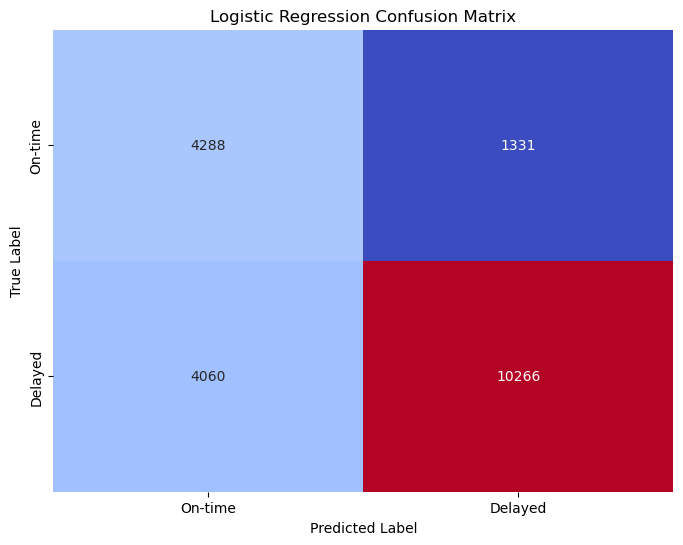

Predictions saved for Logistic Regression!
Model saved for Logistic Regression!

Model Comparison:

Logistic Regression:
Accuracy: 0.7297
Precision: 0.8852
Recall: 0.7166
F1-Score: 0.7920
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.76      0.61      5619
           1       0.89      0.72      0.79     14326

    accuracy                           0.73     19945
   macro avg       0.70      0.74      0.70     19945
weighted avg       0.78      0.73      0.74     19945



In [161]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Define categorical and numerical columns
categorical_cols = [
    "Flight Number", "Type", "Status",
    "Departure IATA Code", "Departure ICAO Code",
    "Arrival IATA Code", "Arrival ICAO Code"
]
numerical_cols = [
    "Max Temp (°F)", "Avg Temp (°F)", "Min Temp (°F)", "Max Dew (°F)",
    "Avg Dew (°F)", "Min Dew (°F)", "Max Humidity (%)", "Avg Humidity (%)",
    "Min Humidity (%)", "Max Wind Speed (mph)", "Avg Wind Speed (mph)",
    "Min Wind Speed (mph)", "Max Pressure (in)", "Avg Pressure (in)",
    "Min Pressure (in)", "Scheduled Time (Unix)", "Estimated Time (Unix)",
    "Arrival Estimated Time (Unix)", "Weather Severity", "Season",
    "Avg Departure Delay (Airport)", "Hourly Traffic (Airport)"
]

# Binary target column transformation
# df["Delay (minutes)"] = (df["Delay (minutes)"] > 0).astype(int)
target_col = "Delay (minutes)"

# Split data into training and testing sets
train_data, test_data = train_test_split(
    df, test_size=0.2, stratify=df[target_col], random_state=42
)
X_train = train_data[categorical_cols + numerical_cols]
y_train = train_data[target_col]
X_test = test_data[categorical_cols + numerical_cols]
y_test = test_data[target_col]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)

# Define models and hyperparameter grids
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", random_state=42),
}
param_grids = {
    "Logistic Regression": {
        "classifier__C": [0.01, 0.1, 1.0, 10.0],
    },
}

# Initialize variables
results = {}
best_models = {}

# Model evaluation and comparison
for name, model in models.items():
    print(f"\n--- Tuning {name} ---")
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    
    grid_search = GridSearchCV(
        pipeline, param_grids[name], cv=3, scoring="f1", n_jobs=-1, verbose=2
    )
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    
    # Make predictions
    y_pred = grid_search.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": classification_report(y_test, y_pred),
    }
    
    # Print metrics
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False,
        xticklabels=["On-time", "Delayed"], yticklabels=["On-time", "Delayed"]
    )
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # Save predictions
    predictions = ["on-time" if pred == 0 else "delayed" for pred in y_pred]
    solution_df = pd.DataFrame({
        "ID": range(1, len(predictions) + 1),
        "Delay": predictions,
    })
    solution_df = solution_df.head(12914)
    solution_df.to_csv(f"{name.replace(' ', '_').lower()}_predictions.csv", index=False)
    print(f"Predictions saved for {name}!")

    # Save the model
    joblib.dump(grid_search.best_estimator_, f"{name.replace(' ', '_').lower()}_model.pkl")
    print(f"Model saved for {name}!")

# Print results
print("\nModel Comparison:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"{metric}: {value:.4f}" if isinstance(value, float) else f"{metric}:\n{value}")


Step 1: Splitting data into train and test sets...
Data split completed.
Step 2: Setting up preprocessing pipeline...
Preprocessing pipeline created.

--- Tuning Random Forest ---
Step 3: Creating pipeline for Random Forest...
Step 4: Running GridSearchCV for Random Forest...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Step 5: Making predictions for Random Forest on the test set...

Random Forest Results:
Accuracy: 0.7436
Precision: 0.7360
Recall: 0.9996
F1-Score: 0.8478
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.10      0.19      4257
           1       0.74      1.00      0.85     10653

    accuracy                           0.74     14910
   macro avg       0.86      0.55      0.52     14910
weighted avg       0.81      0.74      0.66     14910

Step 6: Plotting confusion matrix for Random Forest...


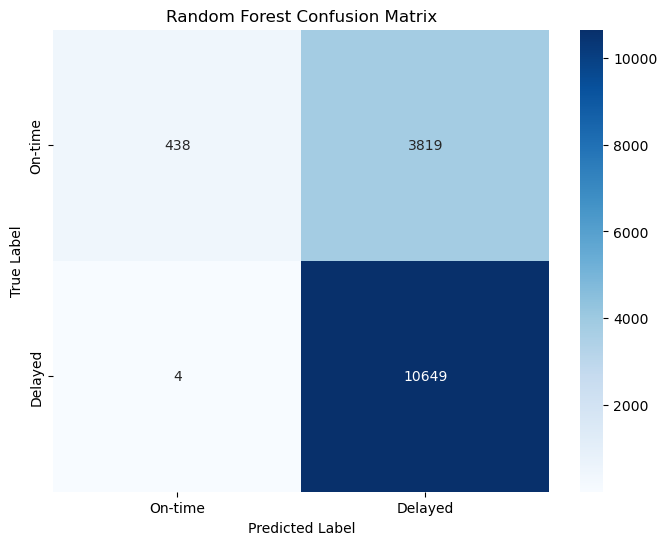

Step 7: Saving predictions for Random Forest to CSV...
Predictions saved to random_forest_binary_1.csv!

--- Tuning Gradient Boosting ---
Step 3: Creating pipeline for Gradient Boosting...
Step 4: Running GridSearchCV for Gradient Boosting...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
Step 5: Making predictions for Gradient Boosting on the test set...

Gradient Boosting Results:
Accuracy: 0.7620
Precision: 0.7578
Recall: 0.9800
F1-Score: 0.8547
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.22      0.34      4257
           1       0.76      0.98      0.85     10653

    accuracy                           0.76     14910
   macro avg       0.79      0.60      0.60     14910
weighted avg       0.77      0.76      0.71     14910

Step 6: Plotting confusion matrix for Gradient Boosting...


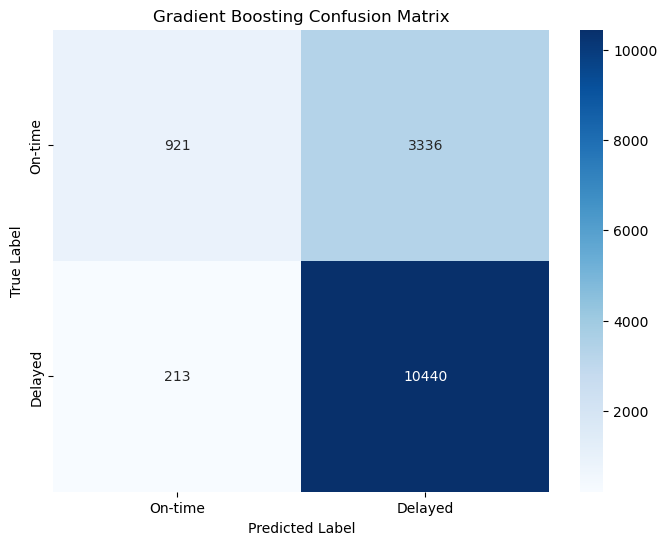

Step 7: Saving predictions for Gradient Boosting to CSV...
Predictions saved to gradient_boosting_binary_1.csv!

--- Tuning Logistic Regression ---
Step 3: Creating pipeline for Logistic Regression...
Step 4: Running GridSearchCV for Logistic Regression...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for Logistic Regression: {'classifier__C': 10, 'classifier__penalty': 'l2'}
Step 5: Making predictions for Logistic Regression on the test set...

Logistic Regression Results:
Accuracy: 0.7941
Precision: 0.8142
Recall: 0.9223
F1-Score: 0.8649
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.47      0.57      4257
           1       0.81      0.92      0.86     10653

    accuracy                           0.79     14910
   macro avg       0.76      0.70      0.72     14910
weighted avg       0.78      0.79      0.78     14910

Step 6: Plotting confusion matrix for Logistic Regression...


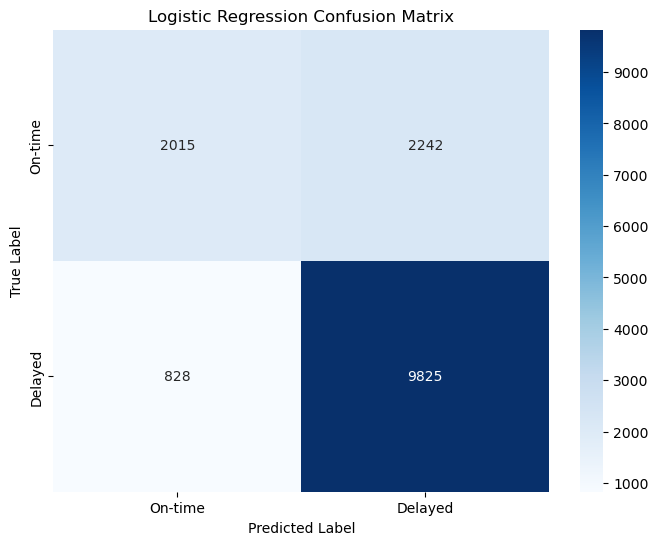

Step 7: Saving predictions for Logistic Regression to CSV...
Predictions saved to logistic_regression_binary_1.csv!

--- Model Comparison ---
Random Forest:
  Accuracy: 0.7436
  Precision: 0.7360
  Recall: 0.9996
  F1-Score: 0.8478
  Classification Report:               precision    recall  f1-score   support

           0       0.99      0.10      0.19      4257
           1       0.74      1.00      0.85     10653

    accuracy                           0.74     14910
   macro avg       0.86      0.55      0.52     14910
weighted avg       0.81      0.74      0.66     14910

Gradient Boosting:
  Accuracy: 0.7620
  Precision: 0.7578
  Recall: 0.9800
  F1-Score: 0.8547
  Classification Report:               precision    recall  f1-score   support

           0       0.81      0.22      0.34      4257
           1       0.76      0.98      0.85     10653

    accuracy                           0.76     14910
   macro avg       0.79      0.60      0.60     14910
weighted avg       0.77  

In [33]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report, 
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Specify categorical and numerical columns
categorical_cols = [
    'Flight Number', 'Type', 'Status', 
    'Departure IATA Code', 'Departure ICAO Code', 
    'Arrival IATA Code', 'Arrival ICAO Code'
]
numerical_cols = [
    'Max Temp (°F)', 'Avg Temp (°F)', 'Min Temp (°F)', 'Max Dew (°F)', 
    'Avg Dew (°F)', 'Min Dew (°F)', 'Max Humidity (%)', 'Avg Humidity (%)', 
    'Min Humidity (%)', 'Max Wind Speed (mph)', 'Avg Wind Speed (mph)', 
    'Min Wind Speed (mph)', 'Max Pressure (in)', 'Avg Pressure (in)', 
    'Min Pressure (in)', 'Scheduled Time (Unix)', 'Estimated Time (Unix)', 
    'Arrival Estimated Time (Unix)', 'Weather Severity', 'Season', 
    'Avg Departure Delay (Airport)', 'Hourly Traffic (Airport)'
]

# Target column (binary classification)
# df["Delay (minutes)"] = (df["Delay (minutes)"] > 0).astype(int)
target_col = "Delay (minutes)"

# Split data into training and testing
print("Step 1: Splitting data into train and test sets...")
train_data = df[df["File Name"].str.contains("train")]
test_data = df[df["File Name"].str.contains("test")]

X_train = train_data[categorical_cols + numerical_cols]
y_train = train_data[target_col]
X_test = test_data[categorical_cols + numerical_cols]
y_test = test_data[target_col]
print("Data split completed.")

# Preprocessing pipeline
print("Step 2: Setting up preprocessing pipeline...")
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)
print("Preprocessing pipeline created.")

# Models to compare
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42)
}

# Hyperparameter tuning using Grid Search
param_grid = {
    "Random Forest": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [5, 10, None],
    },
    "Gradient Boosting": {
        "classifier__n_estimators": [100, 200],
        "classifier__learning_rate": [0.01, 0.1, 0.2],
    },
    "Logistic Regression": {
        "classifier__C": [0.1, 1, 10],
        "classifier__penalty": ["l2"]
    }
}

# Train and evaluate models
best_models = {}
results = {}

# for name, model in models.items():
#     print(f"\n--- Tuning {name} ---")
#     print(f"Step 3: Creating pipeline for {name}...")
#     pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    
#     print(f"Step 4: Running GridSearchCV for {name}...")
#     grid_search = GridSearchCV(
#         pipeline, param_grid[name], cv=3, scoring="f1", n_jobs=-1, verbose=1
#     )
#     grid_search.fit(X_train, y_train)
    
#     # Best model and hyperparameters
#     best_models[name] = grid_search.best_estimator_
#     print(f"Best Parameters for {name}: {grid_search.best_params_}")
    
#     # Evaluate on test set
#     print(f"Step 5: Making predictions for {name} on the test set...")
#     y_pred = grid_search.best_estimator_.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     conf_matrix = confusion_matrix(y_test, y_pred)
    
#     # Store results
#     results[name] = {
#         "Accuracy": accuracy,
#         "Precision": precision,
#         "Recall": recall,
#         "F1-Score": f1,
#         "Confusion Matrix": conf_matrix,
#         "Classification Report": classification_report(y_test, y_pred)
#     }
    
#     print(f"\n{name} Results:")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1-Score: {f1:.4f}")
#     print("Classification Report:")
#     print(classification_report(y_test, y_pred))
    
#     # Plot confusion matrix
#     print(f"Step 6: Plotting confusion matrix for {name}...")
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
#                 xticklabels=["On-time", "Delayed"], yticklabels=["On-time", "Delayed"])
#     plt.title(f"{name} Confusion Matrix")
#     plt.xlabel("Predicted Label")
#     plt.ylabel("True Label")
#     plt.show()



# Loop through models for training, evaluation, and saving predictions
for name, model in models.items():
    print(f"\n--- Tuning {name} ---")
    print(f"Step 3: Creating pipeline for {name}...")
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    
    print(f"Step 4: Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(
        pipeline, param_grid[name], cv=3, scoring="f1", n_jobs=-1, verbose=1
    )
    grid_search.fit(X_train, y_train)
    
    # Best model and hyperparameters
    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    
    # Evaluate on test set
    print(f"Step 5: Making predictions for {name} on the test set...")
    y_pred = grid_search.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": classification_report(y_test, y_pred)
    }
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    print(f"Step 6: Plotting confusion matrix for {name}...")
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["On-time", "Delayed"], yticklabels=["On-time", "Delayed"])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # Save predictions to CSV
    print(f"Step 7: Saving predictions for {name} to CSV...")
    predictions = ["on-time" if pred == 0 else "delayed" for pred in y_pred]
    solution_df = pd.DataFrame({
        "ID": range(1, len(predictions) + 1),  # Create an ID column starting from 1
        "Delay": predictions
    })
    solution_df = solution_df.head(12914)  # Adjusting to specified length
    output_filename = f"{name.replace(' ', '_').lower()}_binary_1.csv"
    solution_df.to_csv(output_filename, index=False)
    print(f"Predictions saved to {output_filename}!")
# Model comparison
print("\n--- Model Comparison ---")
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"  {metric}: {value:.4f}" if isinstance(value, float) else f"  {metric}: {value}")


# Multiclass

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Define categorical and numerical columns
categorical_cols = [
    "Flight Number", "Type", "Status",
    "Departure IATA Code", "Departure ICAO Code",
    "Arrival IATA Code", "Arrival ICAO Code"
]
numerical_cols = [
    "Max Temp (°F)", "Avg Temp (°F)", "Min Temp (°F)", "Max Dew (°F)",
    "Avg Dew (°F)", "Min Dew (°F)", "Max Humidity (%)", "Avg Humidity (%)",
    "Min Humidity (%)", "Max Wind Speed (mph)", "Avg Wind Speed (mph)",
    "Min Wind Speed (mph)", "Max Pressure (in)", "Avg Pressure (in)",
    "Min Pressure (in)", "Scheduled Time (Unix)", "Estimated Time (Unix)",
    "Arrival Estimated Time (Unix)", "Weather Severity", "Season",
    "Avg Departure Delay (Airport)", "Hourly Traffic (Airport)"
]

# Multi-class target column transformation
df["Delay (minutes)"] = pd.cut(df["Delay (minutes)"], bins=[-1, 0, 45, 175, float('inf')], 
                               labels=["No Delay", "Short Delay", "Moderate Delay", "Long Delay"])

target_col = "Delay (minutes)"

# Split data into training and testing sets
train_data, test_data = train_test_split(
    df, test_size=0.2, stratify=df[target_col], random_state=42
)
X_train = train_data[categorical_cols + numerical_cols]
y_train = train_data[target_col]
X_test = test_data[categorical_cols + numerical_cols]
y_test = test_data[target_col]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)

# Define models and hyperparameter grids
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", random_state=42),
}

param_grids = {
    "Logistic Regression": {
        "classifier__C": [0.01, 0.1, 1.0, 10.0],
    },
}

# Initialize variables
results = {}
best_models = {}

# Model evaluation and comparison
for name, model in models.items():
    print(f"\n--- Tuning {name} ---")
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    
    grid_search = GridSearchCV(
        pipeline, param_grids[name], cv=3, scoring="f1_macro", n_jobs=-1, verbose=2
    )
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    
    # Make predictions
    y_pred = grid_search.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": classification_report(y_test, y_pred),
    }
    
    # Print metrics
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    print(f"Step 6: Plotting confusion matrix for {name}...")
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["No Delay", "Short Delay", "Moderate Delay", "Long Delay"],
                yticklabels=["No Delay", "Short Delay", "Moderate Delay", "Long Delay"])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # Save predictions to CSV
    print(f"Step 7: Saving predictions for {name} to CSV...")
    solution_df = pd.DataFrame({
        "ID": range(1, len(y_pred) + 1),  # Create an ID column starting from 1
        "Delay": y_pred
    })
    output_filename = f"{name.replace(' ', '_').lower()}_multi_class_predictions.csv"
    solution_df.to_csv(output_filename, index=False)
    print(f"Predictions saved to {output_filename}!")

# Model comparison summary
print("\nModel Comparison Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"{metric}: {value}")



--- Tuning Logistic Regression ---
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for Logistic Regression: {'classifier__C': 10.0}

Logistic Regression Results:
Accuracy: 0.7266
Precision: 0.6978
Recall: 0.7365
F1-Score: 0.7009
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.76      0.61      4257
           1       0.88      0.71      0.79     10653

    accuracy                           0.73     14910
   macro avg       0.70      0.74      0.70     14910
weighted avg       0.78      0.73      0.74     14910



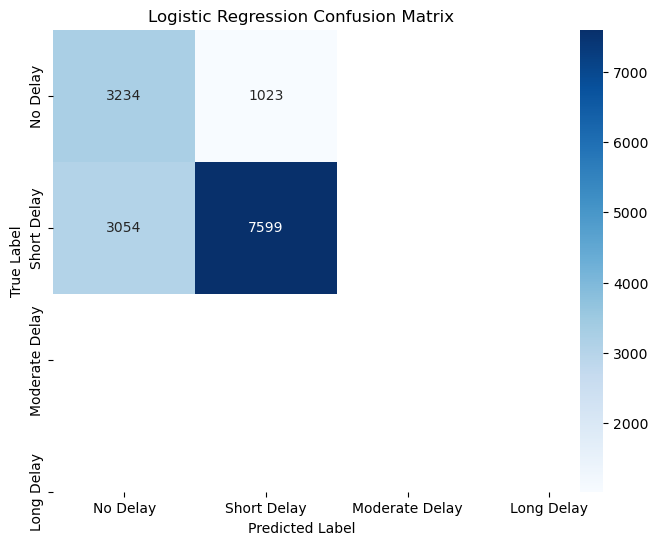

Predictions saved to logistic_regression_multi_class_predictions.csv!

--- Tuning Random Forest ---
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}

Random Forest Results:
Accuracy: 0.6874
Precision: 0.6560
Recall: 0.6858
F1-Score: 0.6570
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.68      0.55      4257
           1       0.84      0.69      0.76     10653

    accuracy                           0.69     14910
   macro avg       0.66      0.69      0.66     14910
weighted avg       0.74      0.69      0.70     14910



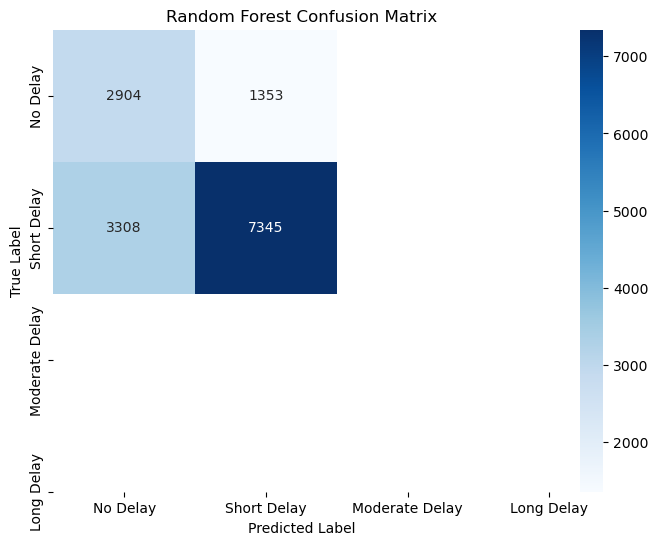

Predictions saved to random_forest_multi_class_predictions.csv!

--- Tuning Support Vector Machine ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters for Support Vector Machine: {'classifier__C': 10, 'classifier__kernel': 'linear'}

Support Vector Machine Results:
Accuracy: 0.7180
Precision: 0.6977
Recall: 0.7396
F1-Score: 0.6964
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.79      0.62      4257
           1       0.89      0.69      0.78     10653

    accuracy                           0.72     14910
   macro avg       0.70      0.74      0.70     14910
weighted avg       0.78      0.72      0.73     14910



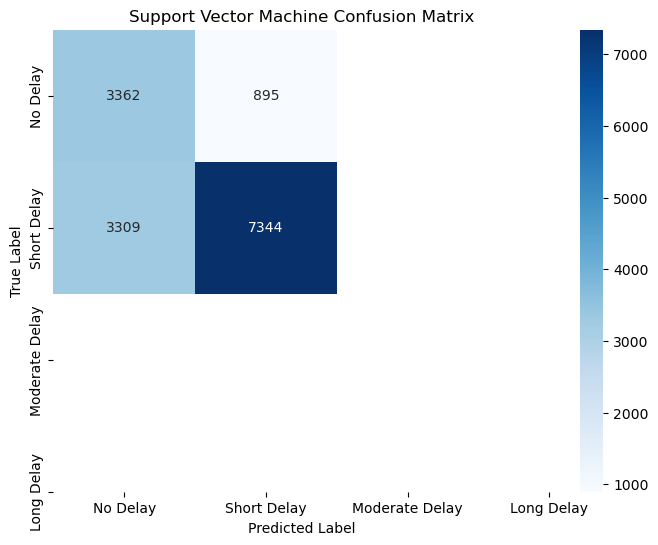

Predictions saved to support_vector_machine_multi_class_predictions.csv!

Model Comparison Results:

Logistic Regression:
Accuracy: 0.7265593561368209
Precision: 0.697831505946974
Recall: 0.7365050569879867
F1-Score: 0.7009268781376092
Classification Report:               precision    recall  f1-score   support

           0       0.51      0.76      0.61      4257
           1       0.88      0.71      0.79     10653

    accuracy                           0.73     14910
   macro avg       0.70      0.74      0.70     14910
weighted avg       0.78      0.73      0.74     14910


Random Forest:
Accuracy: 0.6873910127431254
Precision: 0.6559646458237989
Recall: 0.6858238426123004
F1-Score: 0.6569573381218141
Classification Report:               precision    recall  f1-score   support

           0       0.47      0.68      0.55      4257
           1       0.84      0.69      0.76     10653

    accuracy                           0.69     14910
   macro avg       0.66      0.69      0.6

In [45]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Add new models and hyperparameter grids
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    # "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(class_weight="balanced", random_state=42, probability=True),
    # "Multi-Layer Perceptron": MLPClassifier(random_state=42, max_iter=500),
}

param_grids = {
    "Logistic Regression": {
        "classifier__C": [0.01, 0.1, 1.0, 10.0],
    },
    "Random Forest": {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__max_depth": [None, 10, 20, 30],
    },
    # "Gradient Boosting": {
    #     "classifier__n_estimators": [50, 100, 200],
    #     "classifier__learning_rate": [0.01, 0.1, 0.2],
    #     "classifier__max_depth": [3, 5, 7],
    # },
    "Support Vector Machine": {
        "classifier__C": [0.1, 1, 10],
        "classifier__kernel": ["linear", "rbf"],
    },
    # "Multi-Layer Perceptron": {
    #     "classifier__hidden_layer_sizes": [(50,), (100,), (50, 50)],
    #     "classifier__alpha": [0.0001, 0.001, 0.01],
    # },
}

# Initialize variables
results = {}
best_models = {}

# Model evaluation and comparison
for name, model in models.items():
    print(f"\n--- Tuning {name} ---")
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])

    grid_search = GridSearchCV(
        pipeline, param_grids[name], cv=3, scoring="f1_macro", n_jobs=-1, verbose=2
    )
    grid_search.fit(X_train, y_train)

    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")

    # Make predictions
    y_pred = grid_search.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": classification_report(y_test, y_pred),
    }

    # Print metrics
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["No Delay", "Short Delay", "Moderate Delay", "Long Delay"],
                yticklabels=["No Delay", "Short Delay", "Moderate Delay", "Long Delay"])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Save predictions to CSV
    solution_df = pd.DataFrame({
        "ID": range(1, len(y_pred) + 1),
        "Delay": y_pred
    })
    output_filename = f"{name.replace(' ', '_').lower()}_multi_class_predictions.csv"
    solution_df.to_csv(output_filename, index=False)
    print(f"Predictions saved to {output_filename}!")

# Model comparison summary
print("\nModel Comparison Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"{metric}: {value}")


## Regression

In [55]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Add new models and hyperparameter grids
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "Multi-Layer Perceptron": MLPRegressor(random_state=42, max_iter=500),
}

param_grids = {
    "Linear Regression": {},
    "Ridge Regression": {
        "classifier__alpha": [0.01, 0.1, 1.0, 10.0],
    },
    "Lasso Regression": {
        "classifier__alpha": [0.01, 0.1, 1.0, 10.0],
    },
    "Random Forest": {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__max_depth": [None, 10, 20, 30],
    },
    "Gradient Boosting": {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__learning_rate": [0.01, 0.1, 0.2],
        "classifier__max_depth": [3, 5, 7],
    },
    "Support Vector Regressor": {
        "classifier__C": [0.1, 1, 10],
        "classifier__kernel": ["linear", "rbf"],
    },
    "Multi-Layer Perceptron": {
        "classifier__hidden_layer_sizes": [(50,), (100,), (50, 50)],
        "classifier__alpha": [0.0001, 0.001, 0.01],
    },
}

# Initialize variables
results = {}
best_models = {}

# Model evaluation and comparison
for name, model in models.items():
    print(f"\n--- Tuning {name} ---")
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])

    grid_search = GridSearchCV(
        pipeline, param_grids[name], cv=3, scoring="r2", n_jobs=-1, verbose=2
    )
    grid_search.fit(X_train, y_train)

    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")

    # Make predictions
    y_pred = grid_search.best_estimator_.predict(X_test)
    r2 = grid_search.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    # Store results
    results[name] = {
        "R2": r2,
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
    }

    # Print metrics
    print(f"\n{name} Results:")
    print(f"R2: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")

    # Save predictions to CSV
    solution_df = pd.DataFrame({
        "ID": range(1, len(y_pred) + 1),
        "Predicted": y_pred
    })
    output_filename = f"{name.replace(' ', '_').lower()}_regression_predictions.csv"
    solution_df.to_csv(output_filename, index=False)
    print(f"Predictions saved to {output_filename}!")

# Model comparison summary
print("\nModel Comparison Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")



--- Tuning Linear Regression ---
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters for Linear Regression: {}

Linear Regression Results:
R2: 0.5019
Mean Absolute Error: 0.2542
Mean Squared Error: 0.1016
Root Mean Squared Error: 0.3188
Predictions saved to linear_regression_regression_predictions.csv!

--- Tuning Ridge Regression ---
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for Ridge Regression: {'classifier__alpha': 0.01}

Ridge Regression Results:
R2: 0.4969
Mean Absolute Error: 0.2539
Mean Squared Error: 0.1026
Root Mean Squared Error: 0.3204
Predictions saved to ridge_regression_regression_predictions.csv!

--- Tuning Lasso Regression ---
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for Lasso Regression: {'classifier__alpha': 0.01}

Lasso Regression Results:
R2: 0.0540
Mean Absolute Error: 0.3896
Mean Squared Error: 0.1930
Root Mean Squared Error: 0.4393
Predictions saved to lasso_regression_

KeyError: 'Gradient Boosting'

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Add new models and hyperparameter grids
models = {
    # "Linear Regression": LinearRegression(),
    # "Ridge Regression": Ridge(random_state=42),
    # "Lasso Regression": Lasso(random_state=42),
    # "Random Forest": RandomForestRegressor(random_state=42),
    # "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    # "Multi-Layer Perceptron": MLPRegressor(random_state=42, max_iter=500),
}

param_grids = {
    # "Linear Regression": {},
    # "Ridge Regression": {
    #     "classifier__alpha": [0.01, 0.1, 1.0, 10.0],
    # },
    # "Lasso Regression": {
    #     "classifier__alpha": [0.01, 0.1, 1.0, 10.0],
    # },
    # "Random Forest": {
    #     "classifier__n_estimators": [50, 100, 200],
    #     "classifier__max_depth": [None, 10, 20, 30],
    # },
    # "Gradient Boosting": {
    #     "classifier__n_estimators": [50, 100, 200],
    #     "classifier__learning_rate": [0.01, 0.1, 0.2],
    #     "classifier__max_depth": [3, 5, 7],
    # },
    "Support Vector Regressor": {
        "classifier__C": [0.1, 1, 10],
        "classifier__kernel": ["linear", "rbf"],
    },
    # "Multi-Layer Perceptron": {
    #     "classifier__hidden_layer_sizes": [(50,), (100,), (50, 50)],
    #     "classifier__alpha": [0.0001, 0.001, 0.01],
    # },
}

# Initialize variables
results = {}
best_models = {}

# Model evaluation and comparison
for name, model in models.items():
    print(f"\n--- Tuning {name} ---")
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])

    grid_search = GridSearchCV(
        pipeline, param_grids[name], cv=3, scoring="r2", n_jobs=-1, verbose=2
    )
    grid_search.fit(X_train, y_train)

    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")

    # Make predictions
    y_pred = grid_search.best_estimator_.predict(X_test)
    r2 = grid_search.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    # Store results
    results[name] = {
        "R2": r2,
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
    }

    # Print metrics
    print(f"\n{name} Results:")
    print(f"R2: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")

    # Save predictions to CSV
    solution_df = pd.DataFrame({
        "ID": range(1, len(y_pred) + 1),
        "Predicted": y_pred
    })
    output_filename = f"{name.replace(' ', '_').lower()}_regression_predictions.csv"
    solution_df.to_csv(output_filename, index=False)
    print(f"Predictions saved to {output_filename}!")

# Model comparison summary
print("\nModel Comparison Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")



--- Tuning Support Vector Regressor ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
